## Etivity 2 - Data preparation & Can we learn?

### Student Id: 18203485 

### Student Name : Fergus Mc Hale

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import percentile
import random
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import FactorAnalysis

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC 
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import power_transform

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import re

import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import scipy.stats as stats
import math


%matplotlib inline

In [2]:
CSV_SPLIT = ','
MAX_ITERATIONS = 10

# Task 1

# Fill-in the missing values in the bank dataset. Use the EDA techniques from E-tivity 1 to decide how to fill in missing values. In your notebook, explain shortly (max 250 words) the decisions you have taken.

In [3]:
data = pd.read_csv('./data/bank_et2.csv',sep=CSV_SPLIT, delimiter=None,index_col='Unnamed: 0') #For local Machine

In [4]:
dataset = data.values

In [5]:
numerical_cat = data._get_numeric_data().columns

In [6]:
categorical_cat = data.select_dtypes(include=['category', object]).columns

In [7]:
def display_field_info(category_type):
    if(len(category_type) > 0):
        for key in category_type:
            print("\n______\t",key,"\t_________")
            print("Total Values = \t",data[key].count(),"\n")
            print(data[key].value_counts())
            print("_________________________________________")

In [8]:
data.apply(lambda x: sum(x.isnull()), axis=0)

age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

In [9]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data['age'].values.reshape(-1, 1))
data['age'] = imputer.transform(data['age'].values.reshape(-1, 1))

In [10]:
data['job'].fillna('unknown', inplace=True)

In [11]:
data['education'].fillna('unknown', inplace=True)

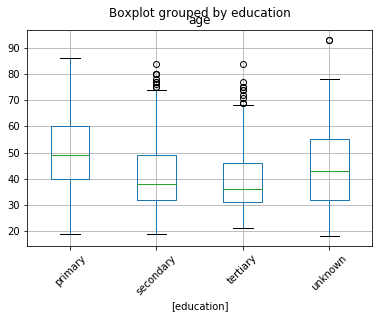

In [12]:
data.boxplot(column='age', by=['education'], rot=45)

In [13]:
data['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

In [14]:
data['contact'].fillna('unknown', inplace=True)

In [15]:
data['poutcome'].value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

In [16]:
data['poutcome'].fillna('other', inplace=True)

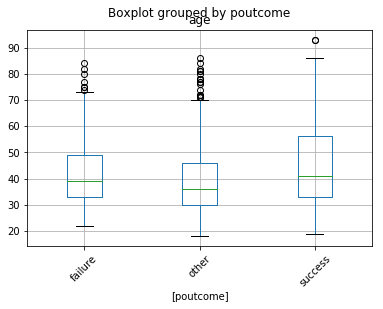

In [17]:
data.boxplot(column='age', by=['poutcome'], rot=45)

In [18]:
data.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.686108,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


In [19]:
display_field_info(numerical_cat)


______	 age 	_________
Total Values = 	 2000 

33.000000    95
35.000000    90
31.000000    87
34.000000    84
37.000000    77
32.000000    77
36.000000    74
38.000000    66
30.000000    64
29.000000    60
28.000000    59
39.000000    56
46.000000    54
40.000000    50
45.000000    45
43.000000    43
27.000000    43
41.000000    43
49.000000    41
48.000000    41
54.000000    40
47.000000    40
60.000000    38
26.000000    37
42.000000    35
53.000000    35
57.000000    34
56.000000    34
52.000000    32
51.000000    32
             ..
63.000000    15
64.000000    15
62.000000    15
23.000000    13
41.753018    12
67.000000     9
68.000000     9
72.000000     8
77.000000     8
71.000000     7
69.000000     6
75.000000     6
65.000000     6
19.000000     6
66.000000     6
80.000000     6
74.000000     5
21.000000     5
78.000000     5
70.000000     4
82.000000     3
84.000000     3
20.000000     2
76.000000     2
73.000000     2
93.000000     2
86.000000     2
81.000000     2
18.00000

In [20]:
display_field_info(categorical_cat)


______	 job 	_________
Total Values = 	 2000 

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
unknown           10
Name: job, dtype: int64
_________________________________________

______	 marital 	_________
Total Values = 	 2000 

married     1111
single       674
divorced     215
Name: marital, dtype: int64
_________________________________________

______	 education 	_________
Total Values = 	 2000 

secondary    995
tertiary     684
primary      217
unknown      104
Name: education, dtype: int64
_________________________________________

______	 default 	_________
Total Values = 	 2000 

no     1985
yes      15
Name: default, dtype: int64
_________________________________________

______	 housing 	_________
Total Values = 	 2000 

no     1037
yes     963
Name: housing, dtype: int64
_________________

# Top 5

In [21]:
data.head(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


# Bottom 5

In [22]:
data.tail(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,unknown,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,other,yes
1996,28.0,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,other,yes
1997,81.0,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,other,yes
1998,46.0,services,married,primary,no,4343,-0.965874,0.302708,yes,no,unknown,20,sep,185,1,-1,0,other,yes
1999,40.0,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,other,yes


# Recheck on empty fields

In [23]:
data.apply(lambda x: sum(x.isnull()), axis=0)

age             0
job             0
marital         0
education       0
default         0
balance         0
ratio_bal_ln    0
ratio_ln_inc    0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
subscribed      0
dtype: int64

# Task 1 Comment

The following were the missing values within the dataset
Inputer is being used on age column to fill in missing values
The following fields was replaced by unknown due not knowing any other ways to classify them other than in a new category

These fields are :

* job : 10 
* education : 104 
* contact : 191 
* poutcome : 454

There were other ways to approach this such as Deleting large number of rows where the NaN is present but this wouldnt make the dataset equal by droping those rows.
For a large number of numerical categories median could be used to fill in its missing values as a quick way to handle the column.
I chose to assign a unique category to job, education , contact , poutcome it will result in lower variance with one hot encoding and negates the loss of data as a new category has been added.
It inadvertanetly add variance to the data that may affect the performance of the chosen algorithm not unless KNN which can handle missing values.

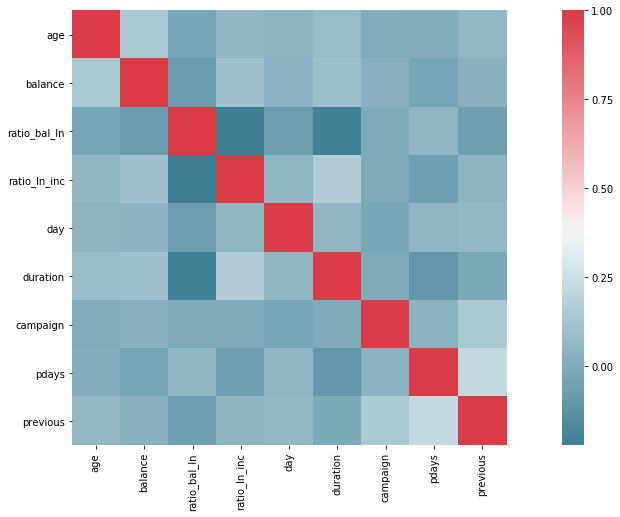

In [24]:
f, ax = plt.subplots(figsize=(20, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


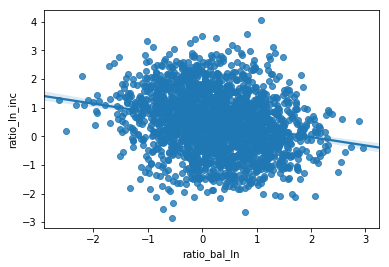

In [25]:
sns.regplot(x='ratio_bal_ln', y='ratio_ln_inc', data=data)

# Task 2

Decide on the treatment of outliers in the bank data set. If appropriate, remove examples with extreme or unexpected attribute values, apply log transformation to numeric attributes with extreme values. Use other methods, if appropriate, to treat outliers as well. In your notebook, explain shortly (max 250 words) the decisions you have taken.

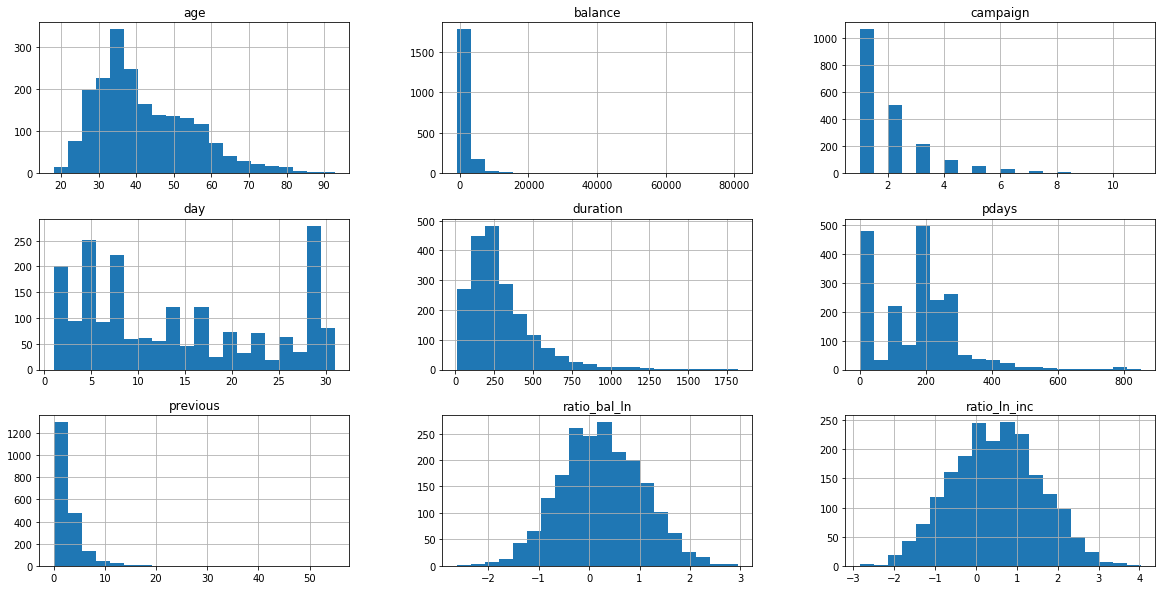

In [26]:
data.hist(figsize=(20,10), bins=20)
plt.show()

In [27]:
def plot_for_distribution(categories):
    size = len(categories)
    index = 0
    while index < size:
        for key in categories:
            fig, axs = plt.subplots(ncols=len(categories),figsize=(30,5))
            if key == 'age':
                data['bc_age'] = power_transform(np.expand_dims(data['age'], axis=1), method='box-cox')
                sns.distplot(data['bc_age'], ax=axs[index])
                index += 1
            elif key == 'balance':
                data['yj_balance'] = power_transform(np.expand_dims(data['balance'], axis=1), method='yeo-johnson')
                sns.distplot(data['yj_balance'], ax=axs[index])
                index += 1
            else:
                sns.distplot(data[key], ax=axs[index])
                index += 1

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


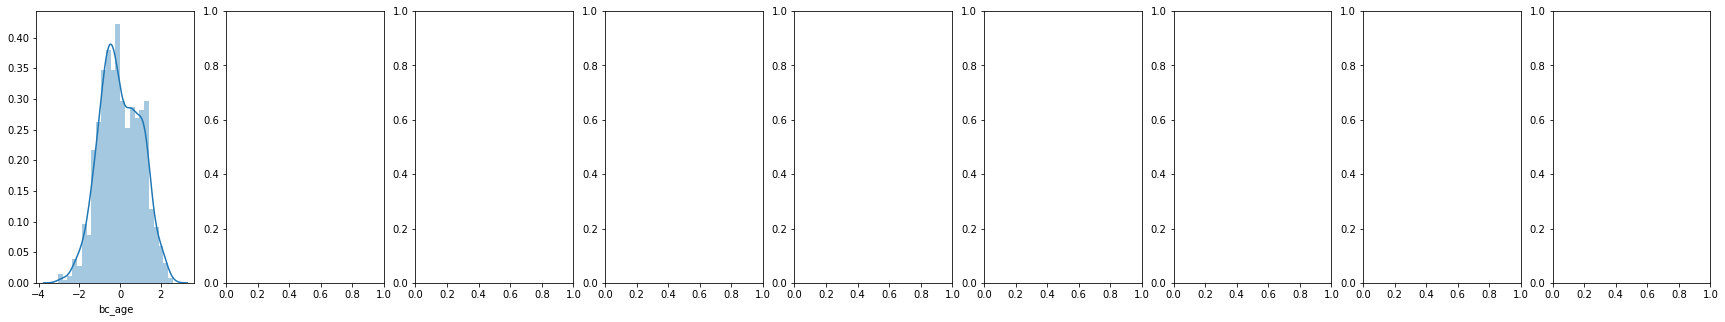

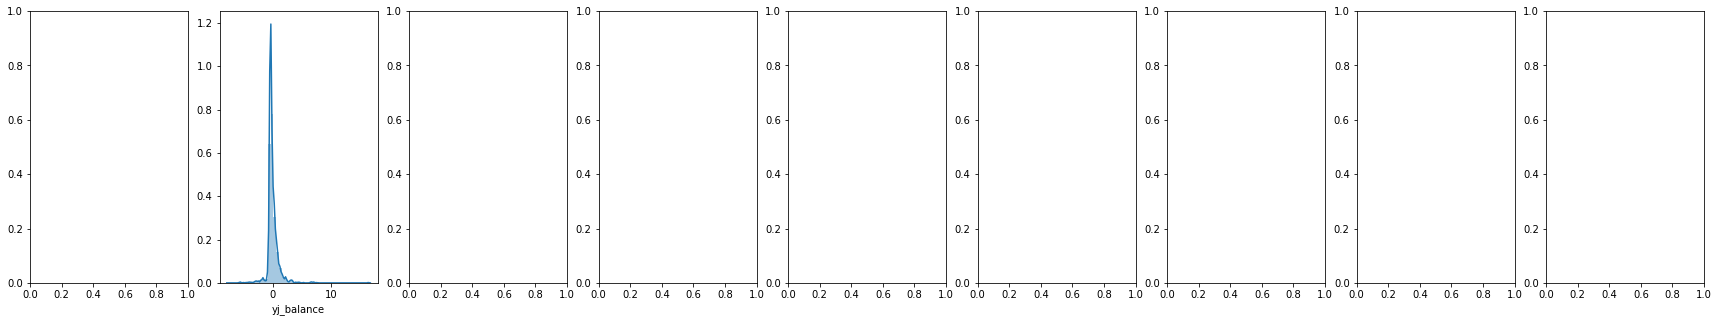

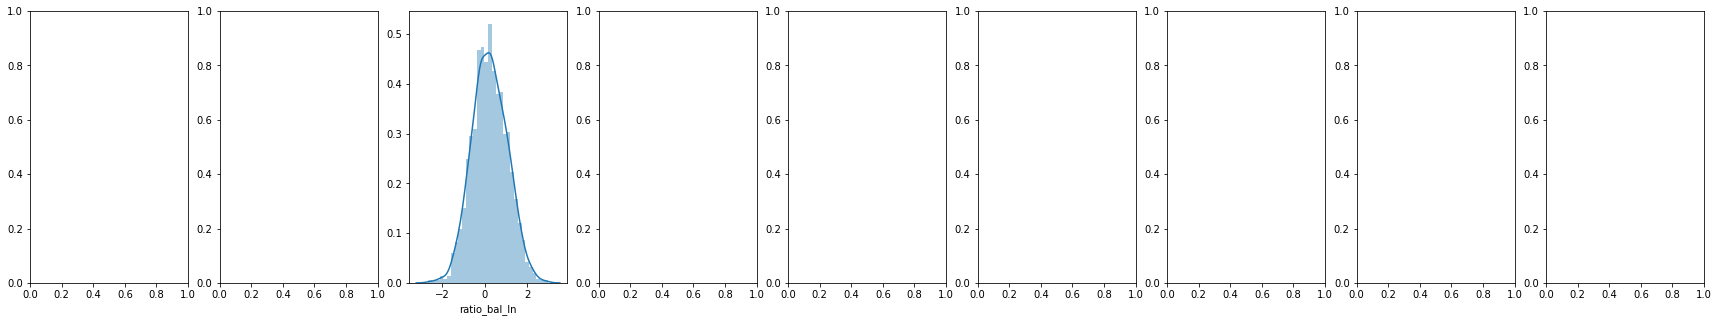

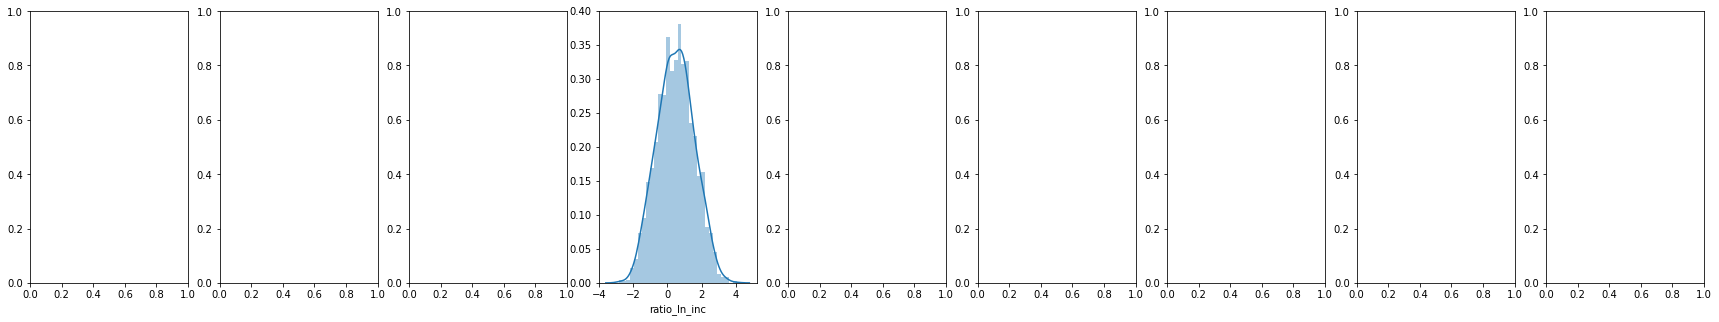

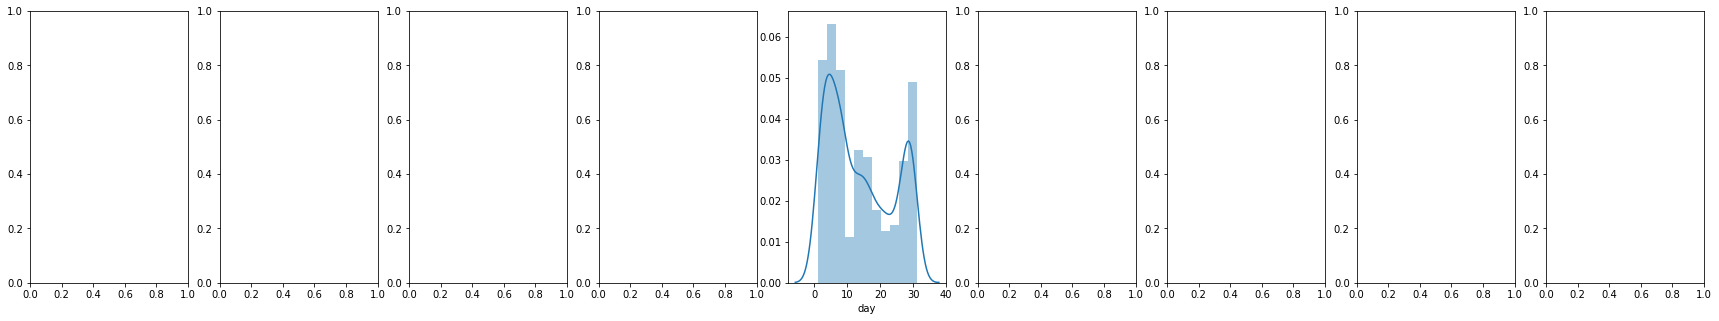

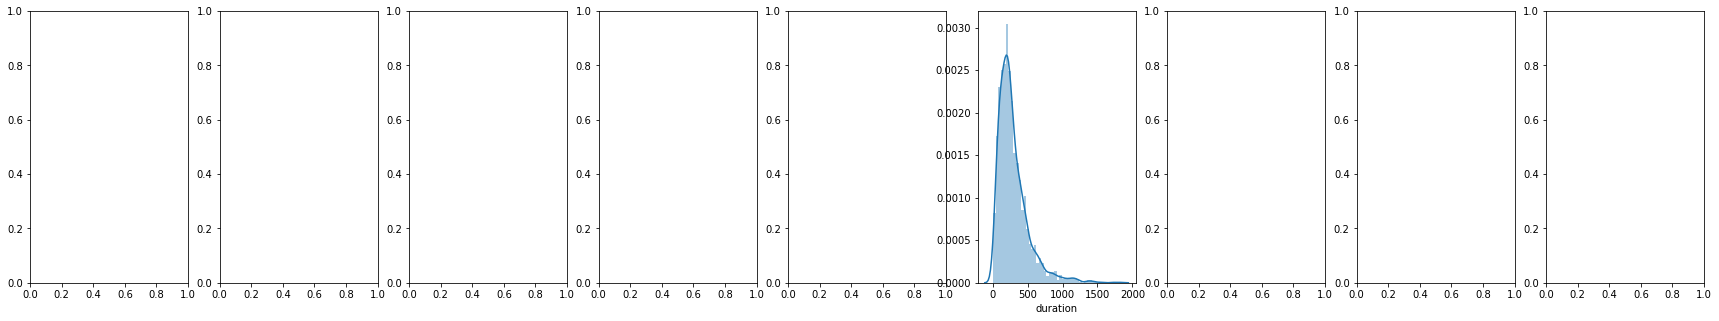

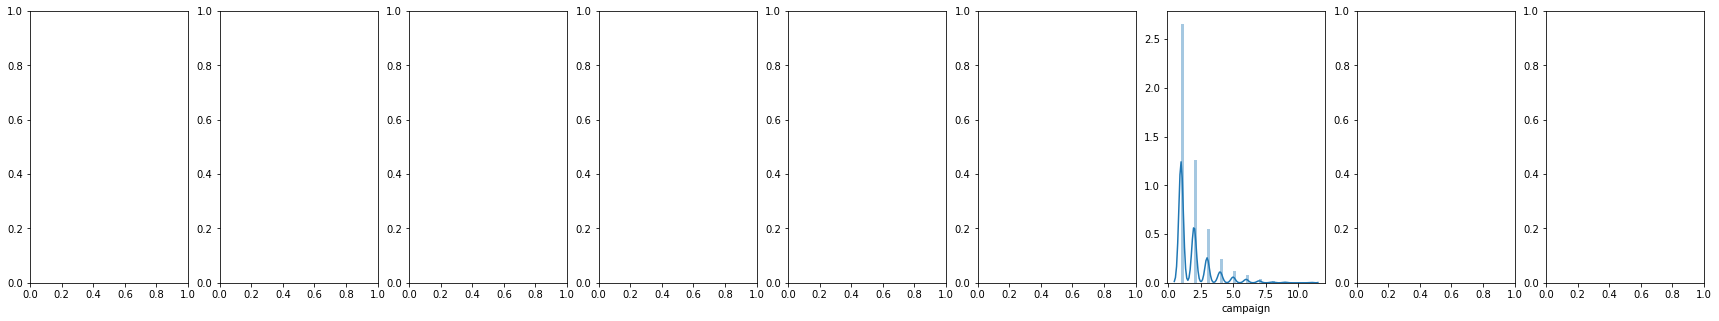

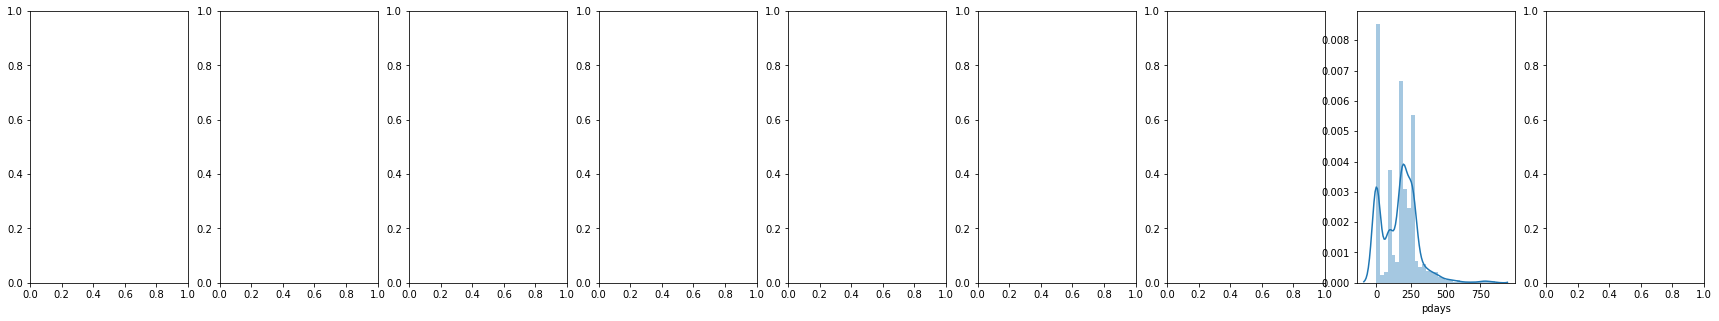

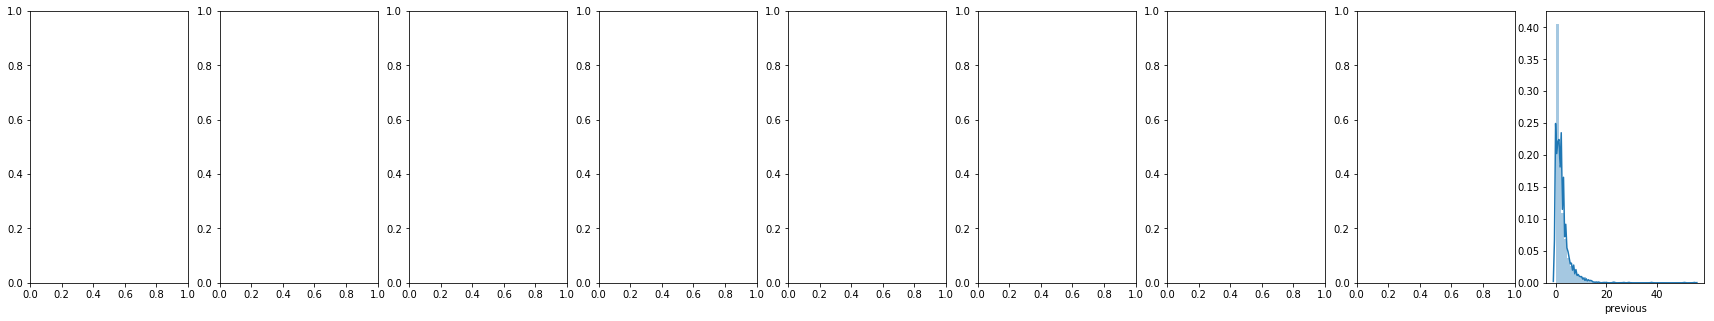

In [28]:
plot_for_distribution(numerical_cat)

In [29]:
data['ratio_bal_ln_log'] = np.log(data['ratio_bal_ln'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


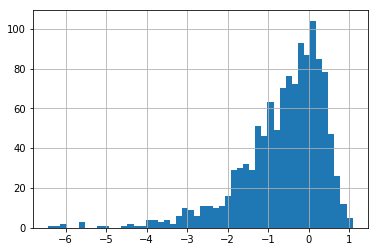

In [30]:
data['ratio_bal_ln_log'].hist(bins=50)

As seen from the distribution plot above there is one outliner of 80000 in the entire distribution.This cannot be removed as in every society there is individuals of different wealth brackets this dataset shows only one 

In [31]:
data['balance'].min()

-980

The minimum balance is negative so in order to make this an even distribution this needs to be counteracted on the row by adding an extra 20 to the row which creates a more even distribution

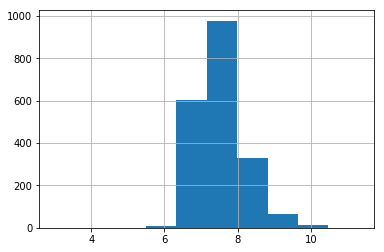

In [32]:
data["balance_positive"] = data["balance"] + 1000
data['balance_positive'].apply(np.log).hist()
plt.show()

In [33]:
data['ratio_ln_inc_log'] = np.log(data['ratio_ln_inc'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


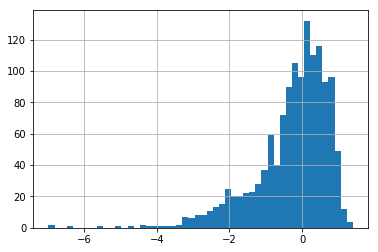

In [34]:
data['ratio_ln_inc_log'].hist(bins=50)

In [35]:
cols_to_transform = data.select_dtypes(include=['category', object]).columns

In [36]:
data_with_dummies = pd.get_dummies(data,columns=cols_to_transform)

# Job vs Education

In [37]:
education_by_job = pd.crosstab(data['education'], data['job']).idxmax(axis=0)

In [38]:
print(education_by_job)

job
admin.           secondary
blue-collar      secondary
entrepreneur      tertiary
housemaid          primary
management        tertiary
retired          secondary
self-employed     tertiary
services         secondary
student          secondary
technician       secondary
unemployed       secondary
unknown            unknown
dtype: object


Interquatile Range

In [39]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

Z Score

In [40]:
def outliers_z_score(ys):
    threshold = 3
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [41]:
def display_outliners(category_type,is_categorical):
    if(len(category_type) > 0):
        for key in category_type:
            if(is_categorical == True):
                label_encoder = LabelEncoder()
                categorical_cat = label_encoder.fit_transform(data[key])
                print("\n______\t",key,"\t_________")
                iqr_outliners = outliers_iqr(categorical_cat)
                print("IQR Outliners = \t",iqr_outliners,"\n")
                z_score_outliners =  outliers_z_score(categorical_cat)
                print("Z-Score Outliners = \t",z_score_outliners,"\n")
                print("_________________________________________")
            else:
                print("\n______\t",key,"\t_________")
                iqr_outliners = outliers_iqr(data[key])
                print("IQR Outliners = \t",iqr_outliners,"\n")
                z_score_outliners =  outliers_z_score(data[key])
                print("Z-Score Outliners = \t",z_score_outliners,"\n")
                print("_________________________________________")

# Display Outliners for both numerical and categorical fields

In [42]:
display_outliners(numerical_cat, False)


______	 age 	_________
IQR Outliners = 	 (array([1033, 1074, 1085, 1182, 1299, 1338, 1344, 1352, 1370, 1372, 1444,
       1552, 1560, 1562, 1646, 1656, 1721, 1724, 1839, 1872, 1903, 1926,
       1992, 1997], dtype=int64),) 

Z-Score Outliners = 	 (array([1033, 1074, 1182, 1299, 1338, 1352, 1370, 1372, 1444, 1552, 1560,
       1562, 1646, 1721, 1872, 1903, 1926, 1997], dtype=int64),) 

_________________________________________

______	 balance 	_________
IQR Outliners = 	 (array([   9,   12,   19,   34,   40,   59,   70,   71,   79,   82,  104,
        166,  196,  211,  220,  227,  236,  286,  301,  323,  333,  389,
        414,  431,  441,  459,  468,  498,  510,  528,  614,  620,  659,
        661,  665,  716,  735,  770,  775,  778,  780,  785,  787,  789,
        794,  812,  822,  846,  971, 1002, 1004, 1010, 1020, 1025, 1030,
       1033, 1050, 1057, 1064, 1066, 1071, 1072, 1074, 1076, 1082, 1084,
       1086, 1088, 1106, 1117, 1162, 1163, 1176, 1184, 1212, 1215, 1255,
       1263

In [43]:
display_outliners(categorical_cat, True)


______	 job 	_________
IQR Outliners = 	 (array([], dtype=int64),) 

Z-Score Outliners = 	 (array([], dtype=int64),) 

_________________________________________

______	 marital 	_________
IQR Outliners = 	 (array([], dtype=int64),) 

Z-Score Outliners = 	 (array([], dtype=int64),) 

_________________________________________

______	 education 	_________
IQR Outliners = 	 (array([], dtype=int64),) 

Z-Score Outliners = 	 (array([], dtype=int64),) 

_________________________________________

______	 default 	_________
IQR Outliners = 	 (array([  32,  185,  318,  450,  499,  520,  597,  645,  674,  799,  864,
        874,  902,  981, 1278], dtype=int64),) 

Z-Score Outliners = 	 (array([  32,  185,  318,  450,  499,  520,  597,  645,  674,  799,  864,
        874,  902,  981, 1278], dtype=int64),) 

_________________________________________

______	 housing 	_________
IQR Outliners = 	 (array([], dtype=int64),) 

Z-Score Outliners = 	 (array([], dtype=int64),) 

________________________

In [44]:
data_with_dummies.fillna(0, inplace=True)

Scaling or Standardization

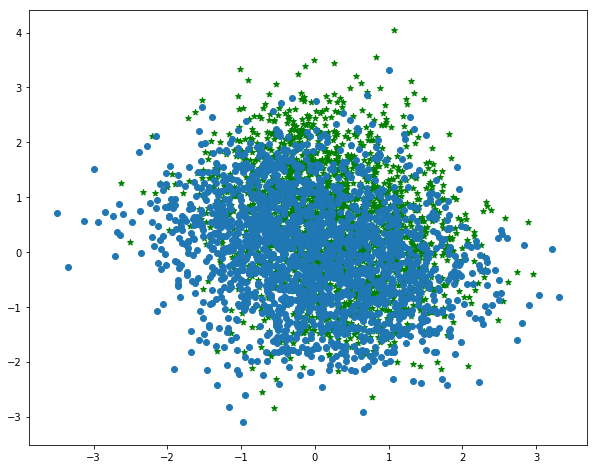

In [45]:
plt.figure(figsize=(10,8))
X = data[['ratio_bal_ln', 'ratio_ln_inc']]
std_scale = preprocessing.StandardScaler().fit(X)
data_std = std_scale.transform(X)
plt.scatter(X['ratio_bal_ln'], X['ratio_ln_inc'],color="green", marker='*')
plt.scatter(data_std[:,0], data_std[:,1])

Image shows the difference is variables between variables that have been scaled(blue) and not scaled(green)

It assumes your data conforms to a normal distribution

In [46]:
X_scaled = preprocessing.scale(X)
print("\nAFTER:")
print("Mean =", X_scaled.mean(axis=0))
print("Std deviation =", X_scaled.std(axis=0))


AFTER:
Mean = [-2.84217094e-17  2.84217094e-17]
Std deviation = [1. 1.]


Normalisation L1 L2

Is a scaling technique that doesnt assume any specific distribution

In [47]:
X_l1 = preprocessing.normalize(X, norm='l1')
X_l2 = preprocessing.normalize(X, norm='l2')
print("\nL1 normalized data:\n", X_l1[X_l1 != 0.])
print("\nL2 normalized data:\n", X_l2[X_l2 != 0.])


L1 normalized data:
 [ 0.73287078  0.26712922 -0.44971257 ...  0.23861941 -0.42884652
  0.57115348]

L2 normalized data:
 [ 0.93953345  0.34245714 -0.63279721 ...  0.29906041 -0.60043129
  0.79967635]


 # Task 2 Comment

There are many approaches to outlines such as :

* Data Log
* Interquartile Range(IQR)
* Z Score
* Scaling
* Normalisation

A log was performed to on ratio_bal_ln , ratio_ln_inc and power transforms on age and balance
The other approaches are IQR, Z Score that allow the outliners to be discovered given a certain range of 25/75 to then finding their lower bounds of the data.
The z score is another approach to this that applies a mean and standard deviation and takes away the values
The log was performed to create a more even gaussian distribution of the values.
The Z score has been applied on both numerical and categorical categories with outliners discovered above.
I didnt see a need to remove outliners early on see a better use to use PCA or Factor Analysis to identify key components necessary for prediction. Its better to have enough data to make a prediction than data you accidently deleted through outliner detection just from experience working with data previously in migration form

# Task 3

Suggest the creation of at least one new feature from the existing ones and justify the usefulness of your choice within the context of the 2-class classification problem you have defined in E-tivity 1.

In [48]:
data['mean_ratio_bal_In_inc'] = data[['ratio_ln_inc_log','ratio_bal_ln_log']].mean(axis=1)

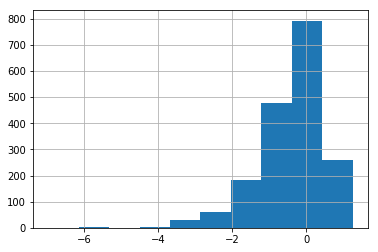

In [49]:
data['mean_ratio_bal_In_inc'].hist()

# Ages per age group

In [50]:
bins = [0, 2, 18, 35, 65, np.inf]
names = ['<2', '2-18', '18-35', '35-65', '65+']

data['age_binned'] = pd.cut(data['age'], bins, labels=names)
data['age_binned'].value_counts()

35-65    1118
18-35     785
65+        96
2-18        1
<2          0
Name: age_binned, dtype: int64

In [51]:
def merge_loan(data):    
    if (data['housing'] == 'yes') or (data['loan'] == 'yes'):
        return 1
    else:
        return 0

In [52]:
data['has_loan'] = data.apply(merge_loan, axis=1)

data.has_loan.value_counts()

1    1043
0     957
Name: has_loan, dtype: int64

# Financial Stablity
Individuals who have a house with no loan and a balance greater than 500

In [53]:
def Is_Financially_Stable(data):
    if (data['has_loan'] == 0) and (data['balance'] > 500):
        return 1
    else:
        return 0

In [54]:
data['Is_Financially_Stable'] = data.apply(Is_Financially_Stable, axis=1)

data.Is_Financially_Stable.value_counts()

0    1418
1     582
Name: Is_Financially_Stable, dtype: int64

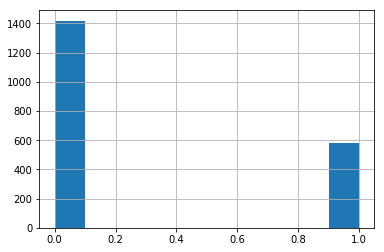

In [55]:
data['Is_Financially_Stable'].hist()

# Loan Repayablity
Is the loan repayable given the individual doesnt have a house and the balance is less than 500 and their age is greater than 50 with a loan and the duration of payment is greater than 7 days. It has identified 10 people in this risk category

In [56]:
def Is_Loan_Repayable(data):
    if (data['housing'] == 'no') and (data['balance'] < 500) and (data['age'] > 50) and (data['has_loan'] == 1) and (data['pdays'] > 7):
        return 1
    else:
        return 0

In [57]:
data['Is_Loan_Repayable'] = data.apply(Is_Loan_Repayable, axis=1)

data.Is_Loan_Repayable.value_counts()

0    1990
1      10
Name: Is_Loan_Repayable, dtype: int64

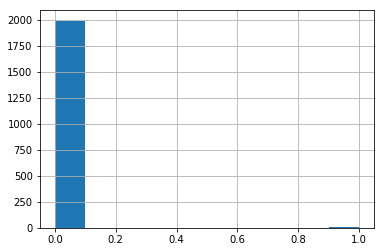

In [58]:
data['Is_Loan_Repayable'].hist()

# Task 3 Comment

The new feature above is the combined elements of ratio_ln_inc_log and ratio_bal_ln log which can now be used as an X variable instead of two features just to see how it will perform compared to two variables as X.
Other new categories created from suggestions age per group and has loan. From these came up with other categories such as Is_Financially_Stable and Is_Loan_Repayable. These two new categories could be used as a combined X variable to predict an unknown y if further correlations are found

# Task 4

Using the dataset you prepared, perform a classification on the data using scikitlearn’s logistic regression.

Generate plots of the approximate probability P[Ein-Eout|>e]. You can use the exact same approach as in E-tivity 1. In the same figure, plot the Hoeffding bound and the VC bound and check whether or not either bound is exceeded (indicate this clearly in a markdown cell).

In [59]:
data['subscribed_code'] = data['subscribed'].map({'yes': 1, 'no': 0})

Applying the same values(X,y) from Etivity 1

In [60]:
X = data[['ratio_bal_ln', 'ratio_ln_inc']].values
y = data['subscribed_code'].values

In [61]:
fa_one = FactorAnalysis(n_components = 2)
X1_pca = pca_data_one = fa_one.fit_transform(X,y)

In [62]:
X_shuffled, y_shuffled = shuffle(X1_pca, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2)
print ("X_train.shape:{}, y_train.shape:{}".format(X_train.shape, y_train.shape))
print ("X_test.shape :{}, y_test.shape :{}".format(X_test.shape, y_test.shape))

X_train.shape:(1600, 2), y_train.shape:(1600,)
X_test.shape :(400, 2), y_test.shape :(400,)


Applying new features to help see can it make prediction better

In [63]:
X2 = data[['Is_Financially_Stable','Is_Loan_Repayable']].values
y2 = data['subscribed_code'].values

In [64]:
fa_two = FactorAnalysis(n_components = 2)
X2_pca = pca_data_two = fa_two.fit_transform(X2,y2)

In [65]:
X2_shuffled, y2_shuffled = shuffle(X2_pca, y2, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_shuffled, y2_shuffled, test_size=0.2)
print ("X_train.shape:{}, y_train.shape:{}".format(X_train.shape, y_train.shape))
print ("X_test.shape :{}, y_test.shape :{}".format(X_test.shape, y_test.shape))

X_train.shape:(1600, 2), y_train.shape:(1600,)
X_test.shape :(400, 2), y_test.shape :(400,)


# Logistic Regression

In [66]:
logistic_classifer = LogisticRegression()
logistic_classifer.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
logistic_classifer.predict(X_train)

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [68]:
logistic_classifer.predict_proba(X_train)

array([[0.5970417 , 0.4029583 ],
       [0.73734861, 0.26265139],
       [0.96411612, 0.03588388],
       ...,
       [0.11345492, 0.88654508],
       [0.95197796, 0.04802204],
       [0.17085926, 0.82914074]])

In [69]:
Ein = 1 - logistic_classifer.score(X_train, y_train)
print("Ein:", Ein)

Eout = 1 - logistic_classifer.score(X_test, y_test)
print("Eout:", Eout)

Ein: 0.21687500000000004
Eout: 0.24250000000000005


In [70]:
y_train_hat = logistic_classifer.predict(X_train)

errors = 0
for i in range(len(y_train)):
    if(y_train_hat[i]!=y_train[i]):
        errors+=1

print(errors)
print(len(y_train))
print("Error Percentage",errors/len(y_train))

347
1600
Error Percentage 0.216875


In [71]:
y_test_hat = logistic_classifer.predict(X_test)

errors = 0
for i in range(len(y_test)):
    if(y_test_hat[i]!=y_test[i]):
        errors+=1

print(errors)
print(len(y_test))
print("Error Percentage",errors/len(y_test))

97
400
Error Percentage 0.2425


In [72]:
Eins = []
Eouts = []

def run_experiment(counter):
    for i in range (counter):
        X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2)
        
        logreg_classifier = LogisticRegression(solver='lbfgs')
        
        logreg_classifier.fit(X_train, y_train)
        
        score_train = logreg_classifier.score(X_train, y_train)
        score_test = logreg_classifier.score(X_test, y_test)
        
        exp_train = 1 - score_train
        exp_test = 1 - score_test
        
        Eins.append(exp_train)
        Eouts.append(exp_test)


run_experiment(1000)

In [73]:
def calc_prob_epsilon(M, Eins, Eouts, epsilons):
    prob_epsilon=[]
    for e in epsilons:   
        counter = 0
        for i in range(M):
            if abs(Eins[i] - Eouts[i])>e:
                   counter +=1
        prob_epsilon.append(counter/M)           
    return prob_epsilon

In [74]:
epsilons = np.arange(0, 1, 0.01)
error_in = [Ein]
error_out = [Eout]
prob_epsilon = calc_prob_epsilon(1, error_in, error_out, epsilons)

print("epsilon proba. dist:", prob_epsilon)

epsilon proba. dist: [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [75]:
epsilons = np.arange(0, 1, 0.01)
N=2000

In [76]:
tolerance = 0.01
dvc = X_train.shape[1] + 1
def get_vc_bound(N, dvc, tolerance, Ein):
    return Ein + math.sqrt((1/(2*N)) * math.log((2 * (math.pow(N,dvc) + 1)/tolerance) ))

print(get_vc_bound(N, dvc, tolerance, Ein))

0.30069180133675366


In [77]:
def plot(error_in,error_out):
    error_diff = abs(np.array(error_in)-np.array(error_out))
    epsilons = np.arange(0.001,0.20,0.001)
    prob_epsilon=[]
    for e in epsilons:
        prob_epsilon.append(len([1 for i in error_diff if i > e])/len(error_diff))
    plt.plot(epsilons, prob_epsilon)

    hoef = [2*math.exp(-2*N*e**2) for e in epsilons]
    vc = [4*(((2*N)**dvc)+1)*math.exp(-(N/8)*e**2) for e in epsilons]

    print("Error exceeds Hoeffding" if max(np.array(prob_epsilon)-np.array(hoef))>0 else "Error does not exceed Hoeffding")
    print("Error exceeds VC" if max(np.array(prob_epsilon)-np.array(vc))>0 else "Error does not exceed VC")
    plt.plot(epsilons, hoef,'r')
    plt.plot(epsilons, vc, 'g')
    plt.yscale('log')
    plt.show()

Error exceeds Hoeffding
Error does not exceed VC


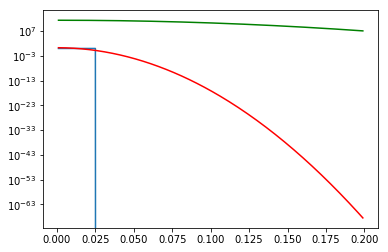

In [78]:
plot(error_in,error_out)

# Task 4 Comment

* As error is increased the bound of hoeffding inequality is broken as M remains infinite.
* The error remains within the VC Bound as it is exponential.
* The VC Bound is more flexible in comparison to hoeffding.
* Learning more feasible using the VC Bound as it is polynomial in nature in comparison to Hoeffding that is infinite.
* To allow generalisation to occur a lower dvc is better compared to a high dvc that is present in more expressive complex models

# Task 5

Using the dataset, make learning curves for logistic regression and two other machine learning algorithms of your choosing using scikitlearn’s learning_curve functionality. Choose one algorithm with low complexity in terms of VC dimension and one algorithm with high complexity.

Comment on what information you can derive from the learning curves  (in a markdown cell) and how this information differs between simple and complex machine learning algorithms.

In [79]:
def plot_learning_curve(estimator):
    cv=5
    n_jobs=2
    
    # Create train sizes
    # Note: The minimum train samples should also have samples of at least 2 classes in the data 
    train_sizes=np.linspace(0.1, 1.0, 5)
    print("Train sizes selected :\n", train_sizes)


    # Determine the cross-validated training and test scores for different training set sizes.
    train_sizes, train_scores, test_scores = learning_curve(estimator=estimator, 
                                                            X=X_train, 
                                                            y=y_train, 
                                                            cv=cv, 
                                                            n_jobs=n_jobs, 
                                                            train_sizes=train_sizes)
    
    print("train_scores:\n", train_scores)
    print("test_scores :\n", test_scores)

    train_scores_mean = np.mean(train_scores, axis=1)
    print("train_scores mean:\n",train_scores_mean)
    train_scores_std  = np.std(train_scores, axis=1)
    print("train_scores std:\n",train_scores_std)
    test_scores_mean  = np.mean(test_scores, axis=1)
    print("test_scores mean:\n",test_scores_mean)
    test_scores_std   = np.std(test_scores, axis=1)
    print("test_scores std:\n",test_scores_std)

    # Extract the string value of estimator using regular expression
    estimator_string = re.sub(r" ?\([^)]+\)", "", str(estimator))
    plt.title("Learning curves of {} estimator.". format(estimator_string), fontsize = 12)
  
    plt.plot(train_sizes, train_scores_mean, 'ro--', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'go--', label= "CV score")
    
    # Highlight the standtard deviation from mean
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.legend(loc="best")
    plt.ylabel('Score')
    plt.xlabel('Training examples')
    
    plt.grid()
    plt.ylim(0.3, 1.01)
    plt.show()

Train sizes selected :
 [0.1   0.325 0.55  0.775 1.   ]
train_scores:
 [[0.77165354 0.80314961 0.80314961 0.80314961 0.80314961]
 [0.78313253 0.77590361 0.77590361 0.77590361 0.77590361]
 [0.77667141 0.76813656 0.77382646 0.77098151 0.77098151]
 [0.77194753 0.76690212 0.77194753 0.76387487 0.76892028]
 [0.78577013 0.78420641 0.78498827 0.78655199 0.7724785 ]]
test_scores :
 [[0.77258567 0.76635514 0.775      0.77742947 0.79623824]
 [0.7788162  0.77258567 0.759375   0.77429467 0.81504702]
 [0.76635514 0.77258567 0.759375   0.77429467 0.81818182]
 [0.7788162  0.78193146 0.76875    0.77742947 0.82131661]
 [0.78193146 0.78193146 0.771875   0.77429467 0.81818182]]
train_scores mean:
 [0.79685039 0.7773494  0.77211949 0.76871847 0.78279906]
train_scores std:
 [0.01259843 0.00289157 0.00290129 0.0030872  0.00521918]
test_scores mean:
 [0.7775217  0.78002371 0.77815846 0.78564875 0.78564288]
test_scores std:
 [0.01005717 0.01866872 0.02068812 0.01836204 0.01676107]


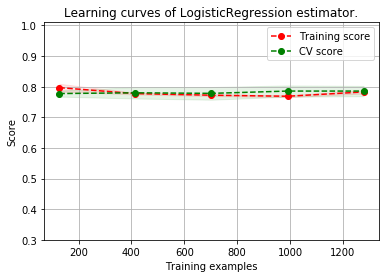

Train sizes selected :
 [0.1   0.325 0.55  0.775 1.   ]
train_scores:
 [[0.76377953 0.80314961 0.80314961 0.80314961 0.80314961]
 [0.78072289 0.77590361 0.77108434 0.77108434 0.77108434]
 [0.77667141 0.76955903 0.77098151 0.77524893 0.77524893]
 [0.77295661 0.76690212 0.77194753 0.76589304 0.77194753]
 [0.78498827 0.78420641 0.78655199 0.78498827 0.77482408]]
test_scores :
 [[0.76323988 0.76635514 0.775      0.77742947 0.79623824]
 [0.78193146 0.77258567 0.75625    0.78056426 0.81504702]
 [0.7788162  0.77258567 0.76875    0.77429467 0.81818182]
 [0.7788162  0.78193146 0.765625   0.77429467 0.81818182]
 [0.78193146 0.77570093 0.771875   0.77429467 0.81818182]]
train_scores mean:
 [0.79527559 0.7739759  0.77354196 0.76992936 0.78311181]
train_scores std:
 [0.01574803 0.00385542 0.00275828 0.0029246  0.00421335]
test_scores mean:
 [0.77565255 0.78127568 0.78252567 0.78376983 0.78439678]
test_scores std:
 [0.01155743 0.01920021 0.01811874 0.01806165 0.01721611]


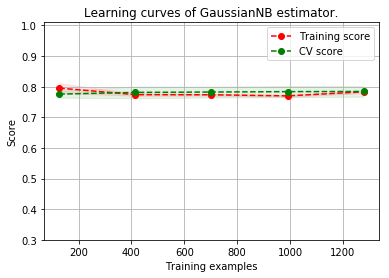

Train sizes selected :
 [0.1   0.325 0.55  0.775 1.   ]
train_scores:
 [[0.77165354 0.80314961 0.80314961 0.80314961 0.80314961]
 [0.78072289 0.77108434 0.77349398 0.77349398 0.77349398]
 [0.77667141 0.76813656 0.77240398 0.77524893 0.77524893]
 [0.77295661 0.76690212 0.77194753 0.76589304 0.76992936]
 [0.78577013 0.78342455 0.78655199 0.78577013 0.77326036]]
test_scores :
 [[0.7694704  0.7694704  0.778125   0.77742947 0.80250784]
 [0.7788162  0.77258567 0.759375   0.77742947 0.81504702]
 [0.76635514 0.77258567 0.76875    0.77429467 0.82131661]
 [0.77570093 0.78193146 0.765625   0.77742947 0.81818182]
 [0.78193146 0.78193146 0.771875   0.77429467 0.81818182]]
train_scores mean:
 [0.79685039 0.77445783 0.77354196 0.76952573 0.78295543]
train_scores std:
 [0.01259843 0.00326859 0.00303758 0.00275241 0.00495973]
test_scores mean:
 [0.77940062 0.78065067 0.78066042 0.78377374 0.78564288]
test_scores std:
 [0.01213816 0.01851782 0.02051901 0.0180117  0.01676107]


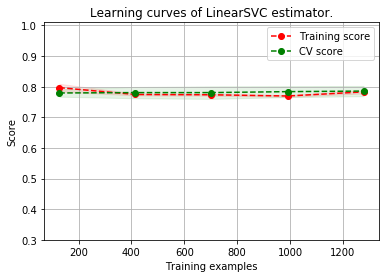

Train sizes selected :
 [0.1   0.325 0.55  0.775 1.   ]
train_scores:
 [[0.77165354 0.80314961 0.80314961 0.80314961 0.80314961]
 [0.78072289 0.78554217 0.77108434 0.77108434 0.77108434]
 [0.77667141 0.76955903 0.77809388 0.77667141 0.77667141]
 [0.77295661 0.76589304 0.77194753 0.77396569 0.78002018]
 [0.78107897 0.78186083 0.78498827 0.78655199 0.77560594]]
test_scores :
 [[0.7694704  0.75700935 0.76875    0.78056426 0.78683386]
 [0.78193146 0.77258567 0.759375   0.77742947 0.81504702]
 [0.78193146 0.78193146 0.765625   0.77429467 0.81191223]
 [0.78193146 0.7694704  0.765625   0.77429467 0.81191223]
 [0.78193146 0.77258567 0.765625   0.77742947 0.81191223]]
train_scores mean:
 [0.79685039 0.77590361 0.77553343 0.77295661 0.7820172 ]
train_scores std:
 [0.01259843 0.00609596 0.00303758 0.00451275 0.0037789 ]
test_scores mean:
 [0.77252557 0.78127372 0.78313896 0.78064675 0.78189677]
test_scores std:
 [0.01033141 0.01849802 0.01559344 0.01655351 0.01595213]


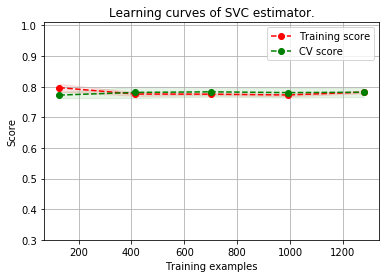

Train sizes selected :
 [0.1   0.325 0.55  0.775 1.   ]
train_scores:
 [[0.79527559 0.85826772 0.85826772 0.85826772 0.85826772]
 [0.81927711 0.84578313 0.85542169 0.85542169 0.85542169]
 [0.81081081 0.82219061 0.82219061 0.82219061 0.82219061]
 [0.80827447 0.81937437 0.8123108  0.81937437 0.82240161]
 [0.81548084 0.81782643 0.82486317 0.81313526 0.81860829]]
test_scores :
 [[0.76012461 0.74454829 0.73125    0.78056426 0.7523511 ]
 [0.72897196 0.74766355 0.74375    0.7460815  0.71159875]
 [0.76323988 0.75700935 0.73125    0.75548589 0.76489028]
 [0.75389408 0.73831776 0.7375     0.74294671 0.73040752]
 [0.74766355 0.74766355 0.728125   0.74294671 0.73354232]]
train_scores mean:
 [0.84566929 0.84626506 0.81991465 0.81634712 0.8179828 ]
train_scores std:
 [0.02519685 0.01400081 0.00455192 0.00522389 0.00393735]
test_scores mean:
 [0.75376765 0.73561315 0.75437508 0.74061321 0.73998823]
test_scores std:
 [0.01644699 0.01372446 0.01210039 0.00775814 0.00785951]


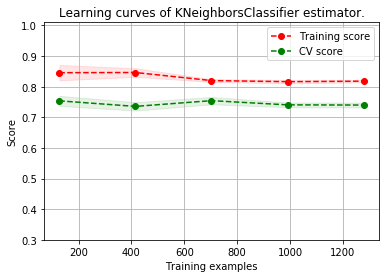

Train sizes selected :
 [0.1   0.325 0.55  0.775 1.   ]
train_scores:
 [[0.84251969 0.95275591 0.95275591 0.95275591 0.95275591]
 [0.79518072 0.80240964 0.82650602 0.82650602 0.82650602]
 [0.78662873 0.80654339 0.79374111 0.78947368 0.78947368]
 [0.7790111  0.78304743 0.78203835 0.7790111  0.78405651]
 [0.78889758 0.78811572 0.7904613  0.78889758 0.78029711]]
test_scores :
 [[0.7165109  0.72274143 0.703125   0.74294671 0.70532915]
 [0.77570093 0.76323988 0.725      0.73981191 0.73040752]
 [0.7788162  0.76635514 0.75625    0.76489028 0.77429467]
 [0.7788162  0.75389408 0.75625    0.76489028 0.77742947]
 [0.7788162  0.7788162  0.76875    0.77742947 0.77742947]]
train_scores mean:
 [0.93070866 0.81542169 0.79317212 0.7814329  0.78733385]
train_scores std:
 [0.04409449 0.01376661 0.00706098 0.00207783 0.00359996]
test_scores mean:
 [0.71813064 0.74683205 0.76812126 0.76625601 0.77624827]
test_scores std:
 [0.01434411 0.01948494 0.00783553 0.01036733 0.00380008]


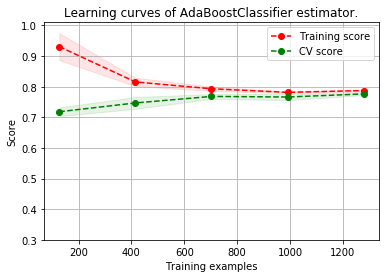

In [80]:
estimators = [LogisticRegression(), GaussianNB(), LinearSVC(), SVC(kernel='rbf'),KNeighborsClassifier(),AdaBoostClassifier()]

# Run the test for learning curve
for e in estimators:
    plot_learning_curve(e)

In [81]:
def plot_confusion(cm_result, labels , title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm_result)
    plt.title(title)
    fig.colorbar(cax)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# SVC Linear

In [82]:
svclassifier = LinearSVC() 
svclassifier.fit(X_train, y_train) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [83]:
y_pred = svclassifier.predict(X_test) 

In [84]:
print(metrics.accuracy_score(y_test, y_pred))
cm_result = metrics.confusion_matrix(y_test, y_pred)

0.755


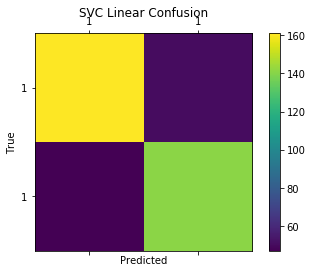

In [85]:
plot_confusion(cm_result,y_pred, 'SVC Linear Confusion')

In [86]:
Ein = 1 - svclassifier.score(X_train, y_train)
print("Ein:", Ein)

Eout = 1 - svclassifier.score(X_test, y_test)
print("Eout:", Eout)

Ein: 0.21687500000000004
Eout: 0.245


# K nearest neighbours 

In [87]:
kneighbours_classifier = KNeighborsClassifier()
kneighbours_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [88]:
y_kneighbourspred = kneighbours_classifier.predict(X_test) 

In [89]:
print(metrics.accuracy_score(y_test, y_kneighbourspred))
knn_cm = metrics.confusion_matrix(y_test, y_kneighbourspred)

0.7375


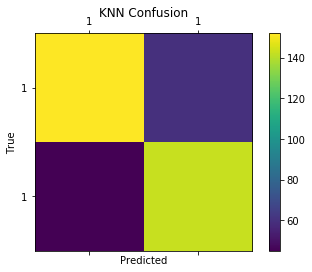

In [90]:
plot_confusion(knn_cm,y_kneighbourspred, 'KNN Confusion')

In [91]:
Ein = 1 - kneighbours_classifier.score(X_train, y_train)
print("Ein:", Ein)

Eout = 1 - kneighbours_classifier.score(X_test, y_test)
print("Eout:", Eout)

Ein: 0.18437499999999996
Eout: 0.26249999999999996


# Adaboost Classifier

In [92]:
adaboost_classifier = AdaBoostClassifier()

In [93]:
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [94]:
y_adaboostpred = adaboost_classifier.predict(X_test) 

In [95]:
print(metrics.accuracy_score(y_test, y_adaboostpred))
ada_cm = metrics.confusion_matrix(y_test, y_adaboostpred)

0.755


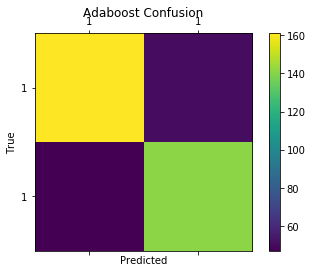

In [96]:
plot_confusion(ada_cm,y_adaboostpred, 'Adaboost Confusion')

In [97]:
Ein = 1 - adaboost_classifier.score(X_train, y_train)
print("Ein:", Ein)

Eout = 1 - adaboost_classifier.score(X_test, y_test)
print("Eout:", Eout)

Ein: 0.213125
Eout: 0.245


# Task 5 Comment

* The VC Dimension measures number of paramaters aka degrees of freedom. The greater the number of paramaters it may have the more diverse the hypothesis set it may have which in turn will lead to a higher growth function mh(N). Each hypthesis set although infinite in nature can only have a finite VC Dimension that will lead to a generalised Ein/Eout. 
* Applying logistic regression, GaussianNB, LinearSVC, SVC lead to both scores(Ein,Eout) being in parallel with no major difference in Training score and CV Score as they generalise well or are tightly coupled due to low expressiveness
* In comparision with more complex algorithms such as KNN and Adaboost(ensemble) there is a larger difference in Ein and Eout
* With KNN Eout being at least less than ~10% behind Training score at staying at ~80% and Adaboost leads to converge at 700 samples with Training score starting at .9 and CV Score starting at .7 and reaching final convergence at ~77%.
* These gap that is displayed in the last two graphs shows that more samples are required in order to bring it to a better convergence or to reduce the VC Dimension to allow convergence to occur.
* The more expressive algorithms (Complex) will have lower bias but will have higher bias. This will then move from an underfit to an overfit.

* [1] [Outliner Detection] (http://colingorrie.github.io/outlier-detection.html)
* [2] [Feature Engineering] (https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html)
* [3] [Learning Curve] (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)
* [4] [Learning Curve Plotting] (https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py)
* [5] [Art of Feature Engineering for Data Science - Nabeel Sarwar] (https://www.youtube.com/watch?v=leTyvBPhYzw)
* [6] [Feature Engineering with H2O - Dmitry Larko, Senior Data Scientist, H2O.ai] [https://www.youtube.com/watch?v=irkV4sYExX4]
* [7] [Power Transforms] [https://machinelearningmastery.com/power-transform-time-series-forecast-data-python/]
* [8] [Harvard References] [Herzallah, W., Faris, H. and Adwan, O. (2018) ‘Feature engineering for detecting spammers on Twitter: Modelling and analysis’, Journal of Information Science, 44(2), pp. 230–247. doi: 10.1177/0165551516684296.]